# Import data

In [4]:
from math import sqrt
import numpy as np
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error
import datetime as dt
import matplotlib.pyplot as plt

dataset     = np.load("/home/vient/These/Data/Data_ZOI/Dataset_64_ZOI.npy",allow_pickle='TRUE').item()
dataH       = dataset['CSED_Hourly']
mask        = dataset['Cloud_Daily']
lat_grid    = dataset['Lat_ZOI']
lon_grid    = dataset['Lon_ZOI']
OI_pred     = np.load('/home/vient/These/Python/Script_Python/Plot-Anim/Result/pred_OI.npy')
AnDA_pred   = np.load('/home/vient/These/Python/Script_Python/Plot-Anim/Result/pred_AnDA.npy').reshape(OI_pred.shape)
DinEOF_pred = np.load('/home/vient/These/Python/Script_Python/Plot-Anim/Result/pred_DinEOF.npy')
DinAE_pred  = np.load('/home/vient/These/Python/Script_Python/Plot-Anim/Result/pred_DinAE.npy')
GENN_pred   = np.load('/home/vient/These/Python/Script_Python/Plot-Anim/Result/pred_GENN.npy')
Save   = True
flagML = False

def prepdata(xH,mask,N_Catalog=0):
    if N_Catalog!=0:
        test=np.zeros(mask[-365:].shape)
        for i in range(0,len(test)):
            test[i]=xH[26304+i*24+12].reshape(test.shape[1],test.shape[2])

        train=np.zeros((N_Catalog*365,xH.shape[1],xH.shape[2]))

        for i in range(N_Catalog):
            for j in range(len(test)):
                h=randrange(0,24)
                train[i*365+j]=xH[i*365+j*24+h]
    else:
        xD=np.empty((xH.shape[0]//24,xH.shape[1],xH.shape[2]))
        for i in range(len(xD)):
            xD[i]=xH[12+i*24]
    mask_train = mask[:-100]
    mask_pred  = mask[-100:]
    x_train    = xD[:len(mask_train)]
    y_pred     = xD[len(mask_train):len(mask_train)+len(mask_pred)]
    return mask_train,mask_pred,x_train,y_pred

mask_train,mask_pred,x_train,y_pred = prepdata(dataH,mask)
noise = np.random.normal(0,0.15*np.nanvar(y_pred),(y_pred.shape))
y_pred_missing =  y_pred+mask_pred+

# Metrics

In [5]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.nanmean(np.abs((y_true - y_pred) / y_true)) * 100

def RMSE(a,b):
    """ Compute the Root Mean Square Error between 2 n-dimensional vectors. """ 
    return (np.sqrt(np.nanmean((a-b)**2)))


def Getmetrics(Target,Pred):
    Target_value = Target.reshape(Target.shape)[np.where(~np.isnan(Target))]
    Pred_value   = Pred.reshape(Target.shape)[np.where(~np.isnan(Target))]
    Target_flat  = Target_value.flatten()
    Pred_flat    = Pred_value.flatten()
    Metrics=dict()

    return {'EVS':explained_variance_score(Target_flat,Pred_flat),'RMSE':RMSE(Target_flat,Pred_flat),'NRMSE':RMSE(Target_flat,Pred_flat)/np.absolute(np.nanmax(Target_flat)-np.nanmin(Target_flat)),'MAbsEr%':mean_absolute_percentage_error(Target_flat,Pred_flat),'MaxEr':max_error(Target_flat,Pred_flat),'MAbsEr':median_absolute_error(Target_flat,Pred_flat),'R²':r2_score(Target_flat,Pred_flat)}

   #lissage donnée entrée flatn + nan
#Metric=Getmetrics(stdsc.fit_transform(gt_pred.reshape(len(y_pred),-1)),Pred_GM )
MetricOI=Getmetrics(y_pred,OI_pred)
MetricDE=Getmetrics(y_pred,DinEOF_pred)
MetricAn=Getmetrics(y_pred,AnDA_pred)
MetricDA=Getmetrics(y_pred,DinAE_pred)
MetricGE=Getmetrics(y_pred,GENN_pred)
print(MetricOI,MetricDE,MetricAn,MetricDA,MetricGE)

{'EVS': 0.9042893831515895, 'RMSE': 0.17573192196751083, 'NRMSE': 0.05069328769390966, 'MAbsEr%': 1.9675189399690536, 'MaxEr': 2.1148864030838013, 'MAbsEr': 0.0, 'R²': 0.90382140816943} {'EVS': 0.9136280733493856, 'RMSE': 0.1669863718210982, 'NRMSE': 0.04817046381165807, 'MAbsEr%': 2.4340620033033757, 'MaxEr': 2.3578034078611765, 'MAbsEr': 0.025633808989510287, 'R²': 0.9131561329450151} {'EVS': 0.9187629029778581, 'RMSE': 0.1615239504063029, 'NRMSE': 0.046594722209419265, 'MAbsEr%': 2.4869000514783908, 'MaxEr': 1.7330885434125398, 'MAbsEr': 0.006206787396993763, 'R²': 0.9187448396522286} {'EVS': 0.9311212091708948, 'RMSE': 0.14881547327624173, 'NRMSE': 0.04292871503159548, 'MAbsEr%': 2.0853494110398803, 'MaxEr': 1.7516677939891814, 'MAbsEr': 2.3440203449354158e-06, 'R²': 0.9310279274853847} {'EVS': 0.9661505798277555, 'RMSE': 0.10425561273540805, 'NRMSE': 0.030074557376536117, 'MAbsEr%': 1.5165217315126167, 'MaxEr': 1.63340498521924, 'MAbsEr': 0.0005856887728441507, 'R²': 0.96614865051

# ZOI and available data

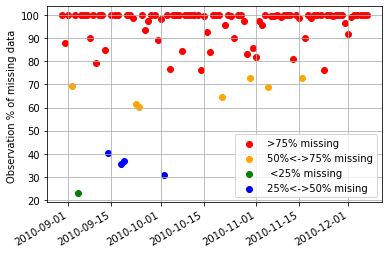

In [6]:
MeanObs = np.empty(len(mask_pred))
time = [dt.datetime(2010,8,30) + dt.timedelta(days=i) for i in range(len(mask_pred))]
for i in range(len(mask_pred)):
    MeanObs[i]=100*len(np.where(np.isnan(y_pred_missing[i]))[0])/len(y_pred[0].reshape(-1))
fig,ax = plt.subplots()
flag50 = False
flag20 = False
flag25 = False
flag80 = False
for i in range(len(mask_pred)):
    if MeanObs[i]<25:
        if flag25:
            ax.scatter(time[i],MeanObs[i],color='green')
        else:
            ax.scatter(time[i],MeanObs[i],color='green',label=' <25% missing')
            flag25=True
    elif 50>=MeanObs[i]>=25:
        if flag50 :
            ax.scatter(time[i],MeanObs[i],color='blue')
        else:
            ax.scatter(time[i],MeanObs[i],color='blue',label='25%<->50% mising')
            flag50=True
    elif MeanObs[i]>=75:
        if flag80:
            ax.scatter(time[i],MeanObs[i],color='red')
        else:
            ax.scatter(time[i],MeanObs[i],color='red',label='>75% missing')
            flag80=True
    else:
        if flag20:
            ax.scatter(time[i], MeanObs[i], color='orange')
        else:
            ax.scatter(time[i], MeanObs[i], color='orange',label=('50%<->75% missing'))
            flag20=True
            
ax.grid()
ax.set_ylabel('Observation % of missing data ')
ax.legend()
fig.autofmt_xdate()
#plt.savefig('Obs.png')

<ipython-input-10-1ac6d063ccb3>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_xticklabels(xlon)
<ipython-input-10-1ac6d063ccb3>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_yticklabels(ylat)


Text(0.5, 1.0, 'Porcentage of available data from cloudy test dataset')

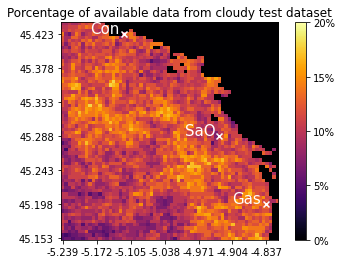

In [10]:
Coord1=[30,46]
Coord2=[10,60]
Coord3=[60,18]
S1      = [OI_pred[:,Coord1[0],Coord1[1]],DinEOF_pred[:,Coord1[0],Coord1[1]],AnDA_pred[:,Coord1[0],Coord1[1]],DinAE_pred[:,Coord1[0],Coord1[1]],GENN_pred[:,Coord1[0],Coord1[1]],y_pred[:,Coord1[0],Coord1[1]],y_pred_missing[:,Coord1[0],Coord1[1]]]
S2      = [OI_pred[:,Coord2[0],Coord2[1]],DinEOF_pred[:,Coord2[0],Coord2[1]],AnDA_pred[:,Coord2[0],Coord2[1]],DinAE_pred[:,Coord2[0],Coord2[1]],GENN_pred[:,Coord2[0],Coord2[1]],y_pred[:,Coord2[0],Coord2[1]],y_pred_missing[:,Coord2[0],Coord2[1]]]
S3      = [OI_pred[:,Coord3[0],Coord3[1]],DinEOF_pred[:,Coord3[0],Coord3[1]],AnDA_pred[:,Coord3[0],Coord3[1]],DinAE_pred[:,Coord3[0],Coord3[1]],GENN_pred[:,Coord3[0],Coord3[1]],y_pred[:,Coord3[0],Coord3[1]],y_pred_missing[:,Coord3[0],Coord3[1]]]

Mapobs=np.empty((y_pred_missing.shape[1],y_pred_missing.shape[2]))
ylat     = np.round(lat_grid[:,0],3)
xlon     = np.round(lon_grid[0,:],3)
for i in range (Mapobs.shape[0]):
    for j in range (Mapobs.shape[1]):
        Mapobs[i][j]=100*len(np.where(~np.isnan(y_pred_missing[:,i,j]))[0])/len(y_pred[:,i,j].reshape(-1))
fig,axe=plt.subplots()
cbar=plt.colorbar(plt.imshow(Mapobs,origin='lower',vmax=20,cmap='inferno'))
axe.set_xticklabels(xlon)
axe.set_yticklabels(ylat)
cbar.set_ticks([0, 5, 10, 15,20])
cbar.set_ticklabels(['0%', '5%', '10%', '15%','20%'])
#axe.scatter(Coord1[1],Coord1[0],text='SaO')
axe.scatter([Coord1[1],Coord2[1],Coord3[1]],[Coord1[0],Coord2[0],Coord3[0]],marker='x',color='w')
for i, txt in enumerate(['SaO','Gas','Con']):
    axe.annotate(txt,([Coord1[1],Coord2[1],Coord3[1]][i]-10,[Coord1[0],Coord2[0],Coord3[0]][i]+0.2),color='w',fontsize=15)


axe.set_title('Porcentage of available data from cloudy test dataset')
#plt.savefig("MeanavaiObs")

# RMSE 

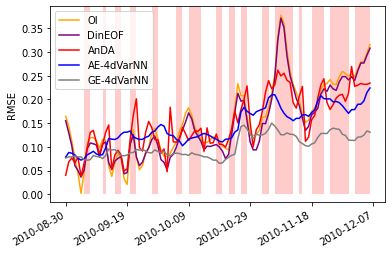

In [12]:
import matplotlib.collections as collections
TRMSE_OI=np.empty(len(y_pred))
TRMSE_DE=np.empty(len(y_pred))
TRMSE_AnDA=np.empty(len(y_pred))
TRMSE_DA=np.empty(len(y_pred))
TRMSE_GE=np.empty(len(y_pred))
for i in range (len(y_pred)):
    TRMSE_OI[i]=RMSE(y_pred[i,:,:],OI_pred[i,:,:])
    TRMSE_DE[i]=RMSE(y_pred[i,:,:],DinEOF_pred[i,:,:])
    TRMSE_AnDA[i]=RMSE(y_pred[i,:,:],AnDA_pred[i,:,:])
    TRMSE_DA[i]=RMSE(y_pred[i,:,:],DinAE_pred[i,:,:])
    TRMSE_GE[i]=RMSE(y_pred[i,:,:],GENN_pred[i,:,:])
    
time    =[dt.datetime(2010,8,30) + dt.timedelta(days=i) for i in range(len(y_pred))]
fig, ax = plt.subplots()
ax.plot(np.arange(0,100),TRMSE_OI,label='OI',color='orange')
ax.plot(np.arange(0,100),TRMSE_DE,label='DinEOF',color='purple')
ax.plot(np.arange(0,100),TRMSE_AnDA,label='AnDA',color='red')
ax.plot(np.arange(0,100),TRMSE_DA,label='AE-4dVarNN',color='blue')
ax.plot(np.arange(0,100),TRMSE_GE,label='GE-4dVarNN',color='grey')

collection = collections.BrokenBarHCollection.span_where(
   np.arange(0,100), ymin=0, ymax=1, where=MeanObs >= 95, facecolor='red', alpha=0.2)
ax.add_collection(collection)
plt.ylabel('RMSE')
plt.xticks([0,20,40,60,80,100],[time[0].strftime('%Y-%m-%d'),time[20].strftime('%Y-%m-%d'),time[40].strftime('%Y-%m-%d'),time[60].strftime('%Y-%m-%d'),time[80].strftime('%Y-%m-%d'),time[99].strftime('%Y-%m-%d')])
#plt.title('Daily RMSE cumputed for the 100 days of interpolation')
plt.legend()
plt.gcf().autofmt_xdate()
#plt.savefig('RMSEdaly')

# Time Series

In [13]:

def VertiPlot_ST(ST,ax,legend): 
    s11  = ax.add_subplot(5,1,1)
    s12  = ax.add_subplot(5,1,2)
    s13  = ax.add_subplot(5,1,3)
    s14  = ax.add_subplot(5,1,4)
    s15  = ax.add_subplot(5,1,5)
    time=[dt.datetime(2010,8,30) + dt.timedelta(days=i) for i in range(len(ST[0]))]
    
    s11.plot(time,ST[0],label='OI',color='orange')
    s11.plot(time,ST[5],label='True State',color='green')
    s11.scatter(time,ST[6],marker='x',label='Obs',color='k')
    s11.set_ylim(-4.1,-1.3)
    s11.grid()
    
    s11.set_title('OI')
    
    s12.plot(time,ST[1],label='DinEOF',color='purple')
    s12.plot(time,ST[5],label='True State',color='green')
    s12.scatter(time,ST[6],marker='x',label='Obs',color='k')
    s12.grid()
    s12.set_ylim(-4.1,-1.3)
    
    s12.set_title('DinEOF')
    
    s13.plot(time,ST[2],label='AnDA',color='red')
    s13.plot(time,ST[5],label='True State',color='green')
    s13.scatter(time,ST[6],marker='x',label='Obs',color='k')
    s13.grid()
    s13.set_ylim(-4.1,-1.3)
    
    s13.set_title('AnDA')
    
    s14.plot(time,ST[3],label='AE-4dVarNN',color='blue')
    s14.plot(time,ST[5],label='True State',color='green')
    s14.scatter(time,ST[6],marker='x',label='Obs',color='k')
    s14.grid()
    s14.set_ylim(-4.1,-1.3)
    
    s14.set_title('AE-4dVarNN')
    
    
    s15.plot(time,ST[4],label='GE-4dVarNN',color='grey')
    s15.plot(time,ST[5],label='True State',color='green')
    s15.scatter(time,ST[6],marker='x',label='Obs',color='k')
    s15.grid()
    s15.set_ylim(-4.1,-1.3)
    plt.gcf().autofmt_xdate()
    
    s15.set_title('GE-4dVarNN')
    if legend:
        s11.legend()
        s12.legend()
        s13.legend()
        s14.legend()
        s15.legend()
        s14.set_ylabel('SSSC')
        s13.set_ylabel('SSSC')
        s12.set_ylabel('SSSC')
        s11.set_ylabel('SSSC')
        s15.set_ylabel('SSSC')
    else :
        s11.set_yticks=([])
        s12.set_yticks=([])
        s13.set_yticks=([])
        s14.set_yticks=([])
        s15.set_yticks=([])
    return

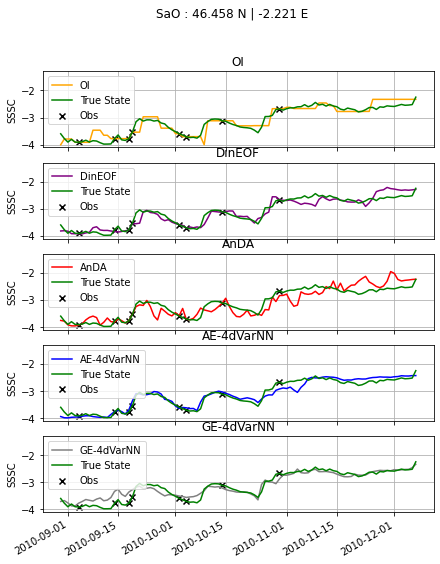

In [14]:
fig=plt.figure(figsize=(7,9))
fig.suptitle('SaO : '+str(round(lat_grid[Coord1[0],Coord1[1]],3))+' N | '+str(round(lon_grid[Coord1[0],Coord1[1]],3))+' E')
VertiPlot_ST(S1,fig,True)
#plt.savefig('ST1')

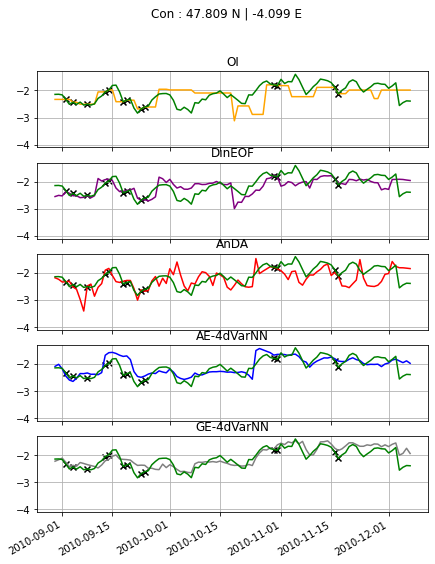

In [15]:
fig=plt.figure(figsize=(7,9))
fig.suptitle('Con : '+str(round(lat_grid[Coord3[0],Coord3[1]],3))+' N | '+str(round(lon_grid[Coord3[0],Coord3[1]],3))+' E')
VertiPlot_ST(S2,fig,False)
#plt.savefig('ST2')

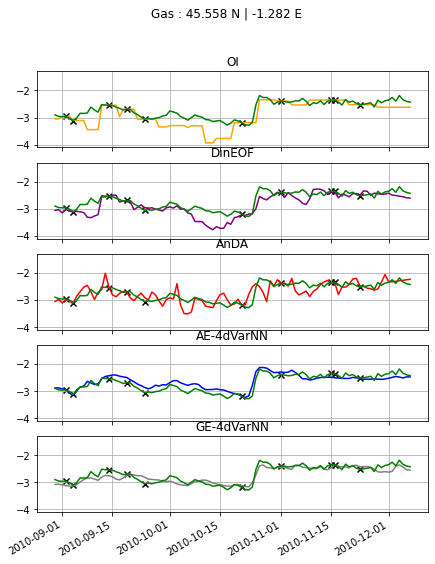

In [16]:
fig=plt.figure(figsize=(7,9))
fig.suptitle('Gas : '+str(round(lat_grid[Coord2[0],Coord2[1]],3))+' N | '+str(round(lon_grid[Coord2[0],Coord2[1]],3))+' E')
VertiPlot_ST(S3,fig,False)
#plt.savefig('ST3')

# 2D Gradient 

<ipython-input-17-a8ddd149ed75>:7: RuntimeWarning: Mean of empty slice
  ngrad = np.nanmean(np.sqrt(gradx**2 + grady**2),axis=0)
<ipython-input-17-a8ddd149ed75>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][0].set_yticklabels(ylat)
<ipython-input-17-a8ddd149ed75>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][0].set_yticklabels(ylat)
<ipython-input-17-a8ddd149ed75>:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2][0].set_xticklabels(xlon)
<ipython-input-17-a8ddd149ed75>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2][0].set_yticklabels(ylat)
<ipython-input-17-a8ddd149ed75>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2][1].set_xticklabels(xlon)
<ipython-input-17-a8ddd149ed75>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses

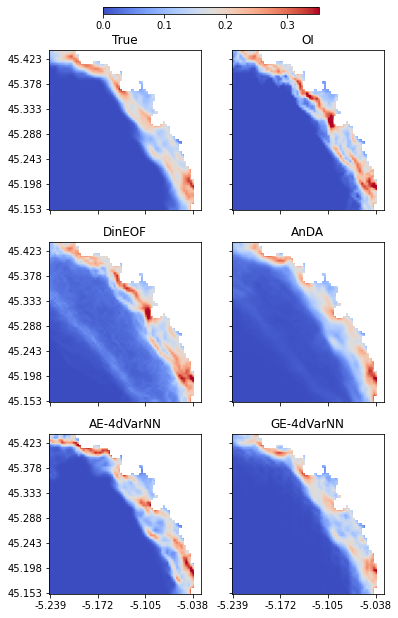

In [17]:
import matplotlib.pyplot as plt

def gradnorm(array):
    grad  = np.gradient(array)
    gradx = grad[1]
    grady = grad[2]
    ngrad = np.nanmean(np.sqrt(gradx**2 + grady**2),axis=0)
    return ngrad

def grad(array):
    grad  = np.gradient(array)
    gradx = grad[1]
    grady = grad[2]
    ngrad = np.sqrt(gradx**2 + grady**2)
    return ngrad

ngradTrue   = gradnorm(y_pred)
ngradOI     = gradnorm(OI_pred)
ngradDinEOF = gradnorm(DinEOF_pred)
ngradAnDA   = gradnorm(AnDA_pred)
ngradDinAE  = gradnorm(DinAE_pred)
ngradGENN   = gradnorm(GENN_pred)

vmin_ref = np.nanmin(ngradTrue)
vmax_ref = np.nanmax(ngradTrue)

ylat     = np.round(lat_grid[:,0],3)
xlon     = np.round(lon_grid[0,:],3)
fig,axes = plt.subplots(3,2,figsize=(6,10))
caxe = fig.add_axes([0.25,0.93,0.5,0.01])
mapc = 'coolwarm'
axes[0][0].set_title(str('True'))
axes[0][0].set_xticklabels([])
axes[0][0].set_yticklabels(ylat)
axes[0][1].set_title(str('OI'))
axes[0][1].imshow(ngradOI,cmap=mapc,vmin=vmin_ref,vmax=vmax_ref,origin="lower",aspect='auto')
axes[0][1].set_xticklabels([])
axes[0][1].set_yticklabels([])
axes[1][0].set_title(str('DinEOF'))
axes[1][0].imshow(ngradDinEOF,cmap=mapc,vmin=vmin_ref,vmax=vmax_ref,origin="lower",aspect='auto')
axes[1][0].set_xticklabels([])
axes[1][0].set_yticklabels(ylat)
axes[1][1].set_title(str('AnDA'))   
axes[1][1].imshow(ngradAnDA,cmap=mapc,vmin=vmin_ref,vmax=vmax_ref,origin="lower",aspect='auto')
axes[1][1].set_xticklabels([])
axes[1][1].set_yticklabels([])
axes[2][0].set_title(str('AE-4dVarNN'))   
axes[2][0].imshow(ngradDinAE,cmap=mapc,vmin=vmin_ref,vmax=vmax_ref,origin="lower",aspect='auto')
axes[2][0].set_xticklabels(xlon)
axes[2][0].set_yticklabels(ylat)
axes[2][1].set_title(str('GE-4dVarNN')) 
axes[2][1].imshow(ngradGENN,cmap=mapc,vmin=vmin_ref,vmax=vmax_ref,origin="lower",aspect='auto')
axes[2][1].set_xticklabels(xlon)
axes[2][1].set_yticklabels([])
color=axes[0][0].imshow(ngradTrue,cmap=mapc,vmin=vmin_ref,vmax=vmax_ref,origin="lower",aspect='auto')
fig.colorbar(color,cax = fig.add_axes([0.25,0.93,0.5,0.01]),orientation="horizontal")
#plt.show()
#plt.close()
#plt.savefig('grad_Map'+'.png')

# RMSE Map

<ipython-input-5-4b7ce9f067a6>:7: RuntimeWarning: Mean of empty slice
  return (np.sqrt(np.nanmean((a-b)**2)))
<ipython-input-19-0d1b780461c4>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][1].set_yticklabels(ylat)
<ipython-input-19-0d1b780461c4>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][0].set_yticklabels(ylat)
<ipython-input-19-0d1b780461c4>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2][0].set_xticklabels(xlon)
<ipython-input-19-0d1b780461c4>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2][0].set_yticklabels(ylat)
<ipython-input-19-0d1b780461c4>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2][1].set_xticklabels(xlon)
<ipython-input-19-0d1b780461c4>:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier insta

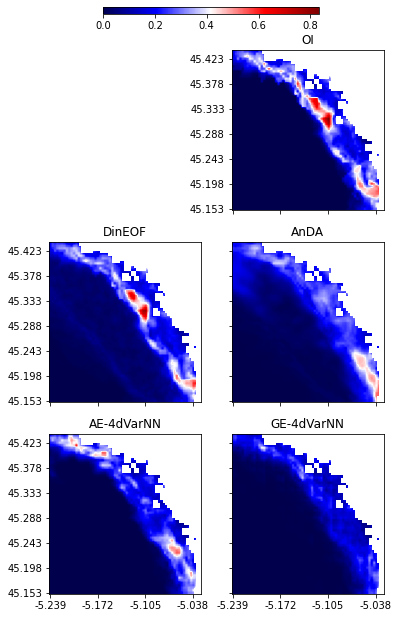

In [19]:
# 2D RMSE 
RMSE2DOI=np.full(y_pred[0].shape,np.nan)
RMSE2DDE=np.copy(RMSE2DOI)
RMSE2DAn=np.copy(RMSE2DOI)
RMSE2DDA=np.copy(RMSE2DOI)
RMSE2DGE=np.copy(RMSE2DOI)
for i in range(y_pred[0].shape[0]):
    for j in range(y_pred[0].shape[0]):
        RMSE2DOI[i,j] = RMSE(y_pred[:,i,j],OI_pred[:,i,j])
        RMSE2DDE[i,j] = RMSE(y_pred[:,i,j],DinEOF_pred[:,i,j])
        RMSE2DAn[i,j] = RMSE(y_pred[:,i,j],AnDA_pred[:,i,j])
        RMSE2DDA[i,j] = RMSE(y_pred[:,i,j],DinAE_pred[:,i,j])
        RMSE2DGE[i,j] = RMSE(y_pred[:,i,j],GENN_pred[:,i,j])
        
vmin_ref = np.nanmin((RMSE2DDA,RMSE2DAn,RMSE2DDE,RMSE2DOI))
vmax_ref = np.nanmax((RMSE2DDA,RMSE2DAn,RMSE2DDE,RMSE2DOI))


ylat     = np.round(lat_grid[:,0],3)
xlon     = np.round(lon_grid[0,:],3)
fig,axes = plt.subplots(3,2,figsize=(6,10))
caxe = fig.add_axes([0.25,0.93,0.5,0.01])
mapc = 'seismic'
axes[0][1].set_title(str('OI'))
axes[0][1].set_xticklabels([])
axes[0][1].set_yticklabels(ylat)
axes[1][0].set_title(str('DinEOF'))
axes[1][0].imshow(RMSE2DDE,cmap=mapc,vmin=vmin_ref,vmax=vmax_ref,origin="lower",aspect='auto')
axes[1][0].set_xticklabels([])
axes[1][0].set_yticklabels(ylat)
axes[1][1].set_title(str('AnDA'))
axes[1][1].imshow(RMSE2DAn,cmap=mapc,vmin=vmin_ref,vmax=vmax_ref,origin="lower",aspect='auto')
axes[1][1].set_xticklabels([])
axes[1][1].set_yticklabels([])
#axes[2][0].grid()
axes[2][0].set_title(str('AE-4dVarNN'))   
axes[2][0].imshow(RMSE2DDA,cmap=mapc,vmin=vmin_ref,vmax=vmax_ref,origin="lower",aspect='auto')
axes[2][0].set_xticklabels(xlon)
axes[2][0].set_yticklabels(ylat)
axes[2][1].set_title(str('GE-4dVarNN'))   
axes[2][1].imshow(RMSE2DGE,cmap=mapc,vmin=vmin_ref,vmax=vmax_ref,origin="lower",aspect='auto')
axes[2][1].set_xticklabels(xlon)
axes[2][1].set_yticklabels([])
axes[0][0].axis('off')
color=axes[0][1].imshow(RMSE2DOI,cmap=mapc,vmin=vmin_ref,vmax=vmax_ref,origin="lower",aspect='auto')
fig.colorbar(color,cax = fig.add_axes([0.25,0.93,0.5,0.01]),orientation="horizontal")
#fig.suptitle(('RMSE map'))
#plt.show()
#plt.close()
#plt.savefig('RMSE_Map'+'.png')